In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Bir doğrusal model,giriş özelliklerin ağırlıklı toplamına bias terimi(intercept terimi de denir.) olarak adlanlarılan bir sabit ekleyerek bir tahmin yapar. Bir doğrusal modelin denklemi aşağıda gösterilmiştir:

Doğrusal regresyon model tahmini:
$$\hat{y}=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$$

Bu denklemde:
* $\hat{y}$ : tahmin edilen değerdir.
* *n* : özellik sayısıdır.
* $x_{i}$ : i'inci özelliğin değeridir.
* $\theta_{j}$ : j'inci model parametresidir($\theta_{0}$ bias terimi ve $\theta_{1},\theta_{2}...\theta_{n}$ özellik ağırlıkları dahil).

Yukarıdaki denklemi vektörleştirilmiş form kullanarak daha kısa bir şekilde yazabiliriz:

Doğrusal regresyon model tahmini (vektörleştirilmiş form):
$$\hat{y}=h_{\theta}(x)=\theta ⋅ x $$

Bu denklemde:
* $\theta$ : $\theta_{0}$ bias terimini ve $\theta_{1}$'den $\theta_{n}$'e kadar özellik ağırlıklarını içeren modelin parametre vektörüdür.
* x : $x_{0}$ her zaman 1'e eşit olan,$x_{0}$'dan $x_{n}$'e kadar özellikleri içeren,örneklerin özellik vektörüdür.
* $\theta· x$ : $\theta_{0}x_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+...+\theta_{n}x_{n}$'a eşit olan,$\theta$ ve $x$ vektörlerinin skaler çarpımıdır.
* $h_{\theta}$ : $\theta$ model parametrelerini kullanan hipotez fonksiyonudur.

Tamam,bir doğrusal modelin yukarıda açıkladığımız gibi tanımlandığını anladık.Peki bu modeli nasıl eğiteceğiz? <b>Bir modeli eğitmek demek,modelin eğitim setine en iyi uydurulmasını(fit) sağlayacak model parametrelerini ayarlamaktır.</b> Yani yukarıdaki denklemdeki $\theta$ parametrelerini öyle ayarlayacağız ki model, eğitim setine çok iyi uydurulmuş olacaktır. Bu amaçla,ilk olarak modelin eğitim setine ne kadar iyi uydurulduğunun ya da ne kadar kötü uydurulduğunun bir ölçüsüne ihtiyacımız vardır. Bir doğrusal regresyon için en yaygın performans ölçüsü: Root Mean Square
Error (RMSE) (Ortalama Hata Kareleri Kökü). Buna bağlı olarak,bir Doğrusal Regresyon modelini eğitmek için, RMSE'yi minimize edecek(en aza indirgeyecek) $\theta$ parametrelerini bulmamız gerekir. Pratikte, MSE'yi minimize etmek daha kolay olduğu için MSE'yi kullanacağız. Zaten MSE'yi minimize eden parametreler RMSE'yi de minimize edecektir.Çünkü bir fonksiyonu minimize eden bir değer o fonksiyonun karekökünü de minimize eder.

Doğrusal Regresyon modeli için MSE maliyet fonksiyonu:

$$MSE(X,h_{\theta})=\frac{1}{m}\sum_{i=1}^{m}(\theta^{T}x^{(i)}-y^{(i)})^{2}$$

Notasyonu basitleştirmek için $MSE(X,h_{\theta})$ yerine $MSE(\theta)$ yazacağız.

# Normal Denklem

Maliyet fonksiyonunu minimize eden $\theta$ parametlerini bulmanın bir yoludur.

Normal Denklem:

$$\hat{\theta}=(X^{T}X)^{-1}X^{T}y$$

Bu denklemde:
* $\hat{\theta}$ : Maliyet fonksiyonunu minimize eden $\theta$ değeridir\değerleridir.
* y : $y^{(1)}$'den $y^{(m)}$'ye kadar hedef değerleri içeren hedef değerler vektörüdür.

Şimdi bu denklemi test etmek için doğrusal görünümlü bazı veriler oluşturalım:

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

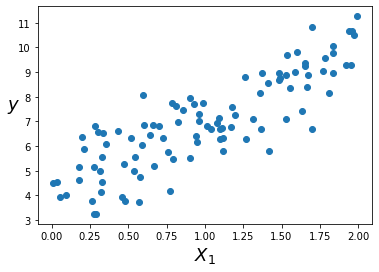

In [3]:
plt.scatter(X,y)
plt.xlabel("$X_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.show()

Şimdi Normal Denklemi kullanarak $\hat{\theta}$'yı hesaplayalım. Matrisin tersini alma işlemi için NumPy'ın linear algebra modülündeki inv() metodunu kullanacağız ve matrislerin skaler çarpımı için dot() metodunu kullanacağız.

In [4]:
X_b=np.c_[np.ones((len(X),1)),X] # x0 her zaman 1 olmalıdır. Bu satırda bu durumu gerçekleştiriyoruz.
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

Verileri oluşturmak için kullandığımız denklem $y=4+3x_{1}$+gürültü idi.

Şimdi bulduğumuz theta değerlerine bakalım:

In [5]:
theta

array([[4.14312485],
       [2.83490515]])

Bulduğumuz theta değerlerinden ilki bias katsayısıdır($\theta_{0}$), ikinci değer ise $x_{1}$in katsayısıdır($\theta{1}$).

Bu durumda bulduğumuz theta değerleri ile tahmin denklemimiz(yani modelimiz) şöyle olmuştur: $\hat{y}=3.94323901+3.06059495x_{1}$

Şimdi bulduğumuz theta($\theta$) değerlerini kullanarak modelimize tahminler yaptırabiliriz:

In [6]:
X_yeni=[[0],[2]]
X_yeni_b=np.c_[np.ones((len(X_yeni),1)),X_yeni]
y_tahmin=X_yeni_b.dot(theta)
y_tahmin

array([[4.14312485],
       [9.81293515]])

Şimdi modelimizin tahminlerini çizdirelim:

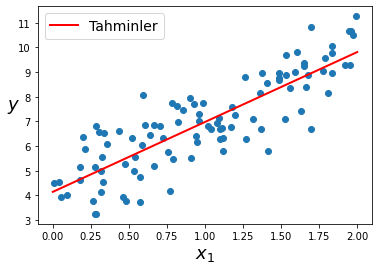

In [7]:
plt.plot(X_yeni,y_tahmin,"r-",linewidth=2, label="Tahminler")
plt.scatter(X,y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis=([0,2,0,15])
plt.legend(loc="upper left", fontsize=14)
plt.show()

Scikit-Learn kullanarak Doğrusal Regresyon gerçekleştirmek basittir:

Scikit-Learn'ün bias terimini(intercept_) özellik ağırlıklarından(coef_) ayırdığını unutmayın.

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
print("Bias :",lin_reg.intercept_)
print("Ağırlıklar :",lin_reg.coef_)

Bias : [4.14312485]
Ağırlıklar : [[2.83490515]]
